## Constructing co-expression graph

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

_Loading expression data for selected mice._

In [58]:
expression_data_all_features = pd.read_pickle("processed_data/expression_standardized_cleaned.pkl")

In [59]:
expression_data_all_features

strain,Nmt1_10338077_Adrenal_Female,Psmb5_10338095_Adrenal_Female,Hdac5_10338098_Adrenal_Female,Dlg1_10338109_Adrenal_Female,Wars_10338116_Adrenal_Female,Psph_10338122_Adrenal_Female,Copa_10338123_Adrenal_Female,Tbl3_10338144_Adrenal_Female,Gbf1_10338168_Adrenal_Female,Polr2f_10338173_Adrenal_Female,...,Igbp1_1460737_at_VTA,Lyk5_1460738_at_VTA,D11Bwg0280e_1460739_at_VTA,Cltb_1460740_at_VTA,C6orf106_1460741_x_at_VTA,Alg3_1460742_at_VTA,Tigd5_1460743_at_VTA,Nek9_1460744_at_VTA,A630098A13Rik_1460745_at_VTA,Fignl1_1460746_at_VTA
B6D2F1,1.616703,2.432203,1.170324,0.225905,1.074278,-1.847609,0.320383,-0.006134,-0.770358,-0.170495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BXD1,-0.292454,-1.828351,0.815264,0.355846,-0.580257,-0.278931,1.467210,0.221928,-0.732092,0.429366,...,0.320381,-0.431583,0.135125,-0.284241,-0.757047,-1.815058,-1.088703,0.321395,0.593960,0.208224
BXD100,0.139235,0.080705,-0.924229,0.986802,0.226120,-0.818164,-0.192351,-0.462258,-0.141695,-0.313939,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BXD101,-1.788163,0.416633,2.972474,0.399015,-0.906150,-1.161312,-0.956903,-1.519994,-0.062429,0.200227,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BXD102,-1.143670,1.043426,-0.646745,0.542909,0.836125,-1.281414,-1.396823,-0.069048,0.784900,-1.729759,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BXD98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.426064,0.176357,-0.258747,-0.744531,1.304658,-1.146873,-0.751144,0.773649,1.254682,-0.217124
BXD99,1.154614,0.617371,1.767062,0.997267,-0.262720,0.103435,-1.199617,0.241588,-0.346694,-0.075486,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C57BL.6J,-0.164771,0.887752,0.072325,0.753954,1.162018,0.752966,-0.143808,-0.800419,0.410435,0.641739,...,0.144243,0.435745,0.960986,0.706080,0.238259,-0.057641,0.533454,-0.042182,-0.051746,-0.265147
D2B6F1,-0.055329,0.121672,-0.754158,0.342765,1.479555,0.976012,0.775473,-0.273517,0.279236,-0.604555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


_As we can observe we have 86 strains (mice) and 1,201,231 expression features._

_Loading the relevant features for our task._

In [60]:
selected_features_df = pd.read_pickle("processed_data/selected_features.pkl")

In [61]:
selected_features = list(selected_features_df.columns)

In [62]:
print('The total number of selected features is {f}'.format(f = len(selected_features)))

The total number of selected features is 799


_We now select the relevant features for all the available strains._

In [63]:
expression_data = expression_data_all_features[selected_features].T

In [64]:
expression_data.index.name = 'snp'

In [65]:
expression_data

,B6D2F1,BXD1,BXD100,BXD101,BXD102,BXD11,BXD12,BXD13,BXD14,BXD15,...,BXD9,BXD90,BXD93,BXD94,BXD95,BXD98,BXD99,C57BL.6J,D2B6F1,DBA.2J
snp,,,,,,,,,,,,,,,,,,,,,
_TC1900000083.mm.1_ScWAT_HFD,NaN,NaN,1.456326,-0.172749,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.405474,NaN,NaN,-0.244974,-1.280198,0.288689,-3.362685,NaN,1.151376
LOC380994_10608615_Adrenal_Male,0.594224,-0.707409,-0.728236,-1.634172,0.552572,-1.191617,NaN,NaN,NaN,NaN,...,NaN,0.203734,NaN,NaN,0.281832,NaN,NaN,0.115223,-0.535594,-0.072212
LOC386442_ILM106420441_Bone_Femur,NaN,0.110103,NaN,NaN,NaN,-0.108859,0.936187,0.498263,0.040433,0.766989,...,0.219584,NaN,NaN,NaN,NaN,NaN,NaN,0.548027,NaN,0.995904
Tpp2_ILM3850093_Bone_Femur,NaN,-0.854873,NaN,NaN,NaN,-0.967380,-1.329904,-0.934045,-0.071489,0.020184,...,-0.679862,NaN,NaN,NaN,NaN,NaN,NaN,-0.471515,NaN,-0.459014
Tmem2_ILM1980037_Bone_Femur,NaN,0.541197,NaN,NaN,NaN,0.357846,-0.675584,-0.383890,-1.175632,-0.842267,...,-0.500568,NaN,NaN,NaN,NaN,NaN,NaN,-0.833933,NaN,-1.025617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H2-T3_10450735_Adrenal_Female,2.898368,0.063323,-1.188649,0.585840,-0.138441,-1.043793,1.191133,NaN,-0.826509,NaN,...,NaN,-1.017926,NaN,NaN,-0.759254,NaN,-0.014279,0.130578,-0.210869,0.037456
Adam18_10577666_Adrenal_Female,1.592983,0.778617,-0.746594,0.047068,0.909744,-1.050256,1.033969,NaN,-0.553355,NaN,...,NaN,-1.008848,NaN,NaN,-1.008848,NaN,0.081575,0.254110,-0.663778,0.205800
LOC268782_ILM104230193_Bone_Femur,NaN,-0.483441,NaN,NaN,NaN,0.339541,-1.130069,0.751032,0.613869,-0.052355,...,-1.179056,NaN,NaN,NaN,NaN,NaN,NaN,-0.218911,NaN,-0.287493


In [66]:
pd.to_pickle(expression_data, "processed_data/expression_data.pkl")

_In order to build our co-expression graph, given two SNPs X and Y:_
- _we first obtain the vectors corresponding to the expression for all strains for those SNPS._
- _we then compute the number of common strains for these two SNPs X and Y, call it **n**._
- _we then compute the euclidian distance **e** between the non NaN values of X and Y._
- _we obtain the distance **d** between X and Y by computing d = e / n._

_We will first visualize the distribution of number of common mice measurement per pair of SNPs. With this distribution we can then set the distance to infinity between X and Y if they don't share at least n common measurements._

In [67]:
def compute_common_mice_per_snp_pair(expression_data):
    
    rows = []
    
    for index_i, row_i in expression_data.iterrows():
        
        new_row = {}
    
        for index_j, row_j in expression_data.iterrows():

                u = row_i.values
                v = row_j.values
                u_valid_indexes = np.argwhere(~np.isnan(u))
                v_valid_indexes = np.argwhere(~np.isnan(v))
                valid_indexes = np.intersect1d(u_valid_indexes, v_valid_indexes)
                n = len(valid_indexes)
                
                new_row[index_j] = n
                
        rows.append(new_row)
    
    return pd.DataFrame(rows, index = expression_data.index)

In [68]:
count = compute_common_mice_per_snp_pair(expression_data)
count

,_TC1900000083.mm.1_ScWAT_HFD,LOC380994_10608615_Adrenal_Male,LOC386442_ILM106420441_Bone_Femur,Tpp2_ILM3850093_Bone_Femur,Tmem2_ILM1980037_Bone_Femur,Lef1_ILM2470082_Bone_Femur,Agxt2_ILM106660044_Bone_Femur,Nppc_ILM2320647_Bone_Femur,Dph3_ILM870731_Bone_Femur,Defcr20_ILM4670022_Bone_Femur,...,Tbk1_1428772_at_A_Brain_INIA,Foxb1_1420705_at_A_Brain_INIA,Tnfrsf13b_ILM1990373_Bone_Femur,Mrpl52_ILM1170204_Bone_Femur,Ceacam14_1450979_at_A_Brain_INIA,H2-T3_10450735_Adrenal_Female,Adam18_10577666_Adrenal_Female,LOC268782_ILM104230193_Bone_Femur,_TC0600002842.mm.1_ScWAT_CD,Kif15_TC0900001652.mm.1_ScWAT_CD
snp,,,,,,,,,,,,,,,,,,,,,
_TC1900000083.mm.1_ScWAT_HFD,38,28,2,2,2,2,2,2,2,2,...,12,12,2,2,12,30,30,2,38,38
LOC380994_10608615_Adrenal_Male,28,46,13,13,13,13,13,13,13,13,...,24,24,13,13,24,43,43,13,30,30
LOC386442_ILM106420441_Bone_Femur,2,13,32,32,32,32,32,32,32,32,...,26,26,32,32,26,14,14,32,2,2
Tpp2_ILM3850093_Bone_Femur,2,13,32,32,32,32,32,32,32,32,...,26,26,32,32,26,14,14,32,2,2
Tmem2_ILM1980037_Bone_Femur,2,13,32,32,32,32,32,32,32,32,...,26,26,32,32,26,14,14,32,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H2-T3_10450735_Adrenal_Female,30,43,14,14,14,14,14,14,14,14,...,26,26,14,14,26,50,50,14,32,32
Adam18_10577666_Adrenal_Female,30,43,14,14,14,14,14,14,14,14,...,26,26,14,14,26,50,50,14,32,32
LOC268782_ILM104230193_Bone_Femur,2,13,32,32,32,32,32,32,32,32,...,26,26,32,32,26,14,14,32,2,2


_We then apply a mask in order to count each pair once._

In [69]:
mask = np.zeros_like(count.values, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

In [70]:
common_mice_per_pair = count.values[mask]

In [71]:
common_mice_per_pair

array([38, 28, 46, ...,  2, 41, 41], dtype=int64)

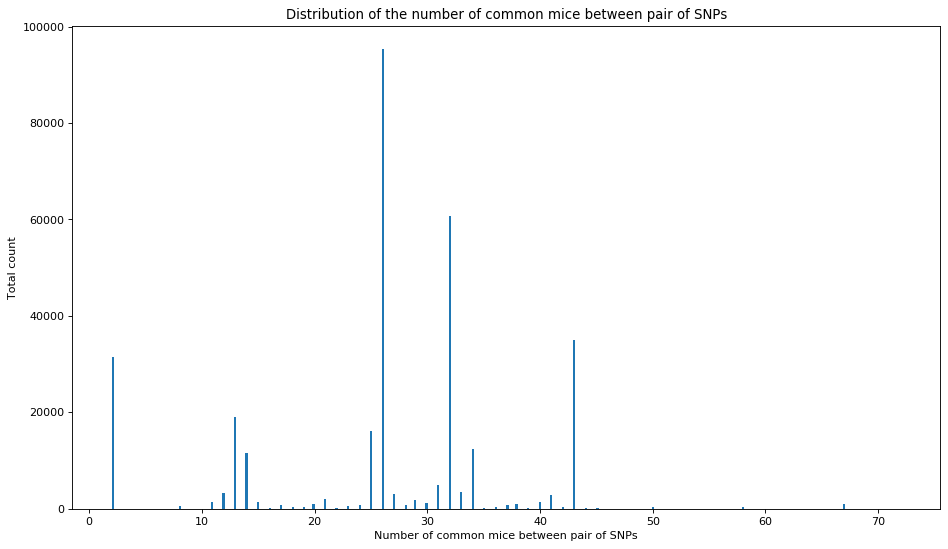

In [72]:
plt.figure(figsize = (14, 8), dpi = 80)
plt.hist(common_mice_per_pair, bins='auto')
plt.title('Distribution of the number of common mice between pair of SNPs')
plt.xlabel('Number of common mice between pair of SNPs')
plt.ylabel('Total count')
plt.show()

We decide to consider similarity only between SNPs for which we have expression data from at least 10 mice in common.

In [73]:
from scipy.spatial.distance import squareform, pdist
from sklearn.metrics import pairwise_distances, pairwise

_Define the distance function that we are using to build the graph._

In [74]:
def distance(u, v):
    # Obtain common indexes that are non NaN for both u and v
    u_valid_indexes = np.argwhere(~np.isnan(u))
    v_valid_indexes = np.argwhere(~np.isnan(v))
    valid_indexes = np.intersect1d(u_valid_indexes, v_valid_indexes)
    
    
    
    # Obtain valid common vectors and length of these vectors
    u_valid = u[valid_indexes]
    v_valid = v[valid_indexes]
    n = len(valid_indexes)
    # threshold on the number of mice
    if n < 10:
        distance = 1*n
    else:
        distance = np.linalg.norm(u_valid-v_valid)
    return distance / n 

In [75]:
distances = pd.DataFrame(
    squareform(pdist(expression_data,
                    distance)),
    columns = expression_data.index,
    index = expression_data.index
)

In [76]:
distances_matrix = distances.values
print('Matrix containing distances has shape {s}'.format(s = distances_matrix.shape))

Matrix containing distances has shape (799, 799)


In [77]:
def epsilon_similarity_graph(distances: np.ndarray, sigma=1, epsilon=0):
    """ distances (n x n): matrix containing the distance between all our data points.
        sigma (float): width of the kernel
        epsilon (float): threshold
        Return:
        adjacency (n x n ndarray): adjacency matrix of the graph.
    """
    W = np.exp(- distances / (2 * sigma ** 2)) # Apply the kernel to the squared distances
    W[W<epsilon] = 0 # Cut off the values below epsilon
    np.fill_diagonal(W, 0) # Remove the connections on the diagonal
    return W

In order to find a good value for sigma, we first compute the median $L_2$ distance between data points, which will be our first estimate for sigma.

In [78]:
median_dist = np.median(distances_matrix)
median_dist

0.2573980719095206

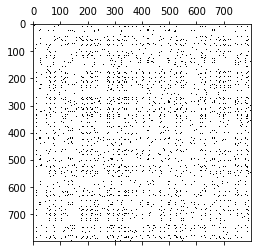

In [79]:
c = 0.7 # c is linked to the sparsity of the graph
adjacency = epsilon_similarity_graph(distances_matrix, sigma=median_dist*c, epsilon=0.1)
plt.spy(adjacency)
plt.show()

We tuned parameters to have a sparse graph with dominating connected component. Further we operate only on the connected component. The remaining SNP expressions are inferred as previously: they are set to the mean.

In [80]:
import networkx as nx
G = nx.from_numpy_matrix(adjacency)

In [81]:
node_values = {}
for i in range(expression_data.shape[0]): 
        node_values.update({i: {}})
        
for mouse in expression_data.columns.values:   
    mouse_expression = expression_data[mouse].values
    non_nan_expressions = np.argwhere(~np.isnan(mouse_expression))
    for i in range(expression_data.shape[0]): 
        node_values[i].update({mouse+" value": 0.0})

    for i in non_nan_expressions:
        i = i[0]
        node_values[i].update({mouse+" value": mouse_expression[i]})

In [82]:
nx.set_node_attributes(G, node_values)

In [83]:
nx.is_connected(G)
comp = nx.connected_components(G)

In [84]:
components = [len(list(com)) for com in comp]

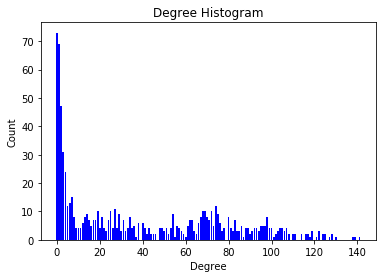

In [85]:
import collections
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

We decide to use only the biggest subgraph since the disconnected components are small: each having only a few nodes that are likely far apart from the others according to our distance metric.

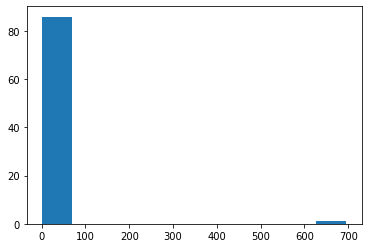

In [86]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)
subgraphs = list(connected_component_subgraphs(G)) # Use this for version 2.4+ of networkx
# subgraphs = list(nx.connected_component_subgraphs(G)) # Earlier versions of networkx

graph_nodes = [len(graph.degree()) for graph in subgraphs]
biggest_subgraph_id = graph_nodes.index(max(graph_nodes))
plt.hist(graph_nodes);

In [87]:
subgraph = subgraphs[biggest_subgraph_id]

In [88]:
np.save("processed_data/coexpression_adjacency.npy", nx.to_numpy_matrix(subgraph))

In [89]:
np.save("processed_data/coexpression_node_indices.npy", np.array(list(subgraph.nodes)))

In [90]:
nx.write_gexf(subgraph, "data/graph.gexf")